In [238]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd 
import pymorphy2


In [239]:
corp_reports = {}
ecological_reports = {}
social_responsibility_reports = {}
COMPANIES = {'ALROSA', 'SEVERSTAL', 'RUSHYDRO', 'GAZPROM', 'AEROFLOT'}
morph = pymorphy2.MorphAnalyzer()

In [127]:

with open('ALROSA_2018.txt') as alrosa:
    report_alrosa = ''.join(alrosa.readlines())
    corp_reports['ALROSA'] = filter_normailize(report_alrosa[256789:381445]) #256789:381445
    ecological_reports['ALROSA'] = filter_normailize(report_alrosa[215588:230131]) # 215588:230131
    social_responsibility_reports['ALROSA'] = filter_normailize(report_alrosa[230968:256615]) # 230968:256615


In [128]:
with open('Rushidro_God_otchyot_2018.txt') as rushydro:
    report_rushydro = ''.join(rushydro.readlines())
    corp_reports['RUSHYDRO'] = filter_normailize(report_rushydro[433102:606742]) #433102:606742
    ecological_reports['RUSHYDRO'] = filter_normailize(report_rushydro[384544:432473]) # 384544:432473
    social_responsibility_reports['RUSHYDRO'] = filter_normailize(report_rushydro[329698:384489]) # 329698:384489

In [129]:
with open('Aeroflot_God_otch_2018.txt') as aeroflot:
    report_aeroflot = ''.join(aeroflot.readlines())
    corp_reports['AEROFLOT'] = filter_normailize(report_aeroflot[310012:458966]) #310012:458966
    ecological_reports['AEROFLOT'] = filter_normailize(report_aeroflot[285707:297821]) # 285707:297821
    social_responsibility_reports['AEROFLOT'] = filter_normailize(report_aeroflot[244758:283894]) # 244758:283894


In [130]:
with open('Gazprom_God_otch_2018.txt') as gazprom:
    report_gazprom = ''.join(gazprom.readlines())
    corp_reports['GAZPROM'] = filter_normailize(report_gazprom[321083:383723]) #321083:383723
    ecological_reports['GAZPROM'] = filter_normailize(report_gazprom[274935:307752]) # 274935:307752
    social_responsibility_reports['GAZPROM'] = filter_normailize(report_gazprom[308483:319601]) # 308483:319601


In [131]:
with open('SeverStal_ust_2018.txt') as severstal:
    report_severstal = ''.join(severstal.readlines())
    corp_reports['SEVERSTAL'] = filter_normailize(report_severstal[103601:140598]) #103601:140598
    ecological_reports['SEVERSTAL'] = filter_normailize(report_severstal[215400:302926]) # 215400:302926
    social_responsibility_reports['SEVERSTAL'] = filter_normailize(report_severstal[308483:347984]) # 308483:347984

In [249]:
p = re.compile("В 2018 году угольщики решили избавить")
for m in p.finditer(report_severstal):
    print(m.start(), m.group())


347984 В 2018 году угольщики решили избавить


In [134]:
overall_corp = ''
overall_eco = ''
overall_social = ''

for company in COMPANIES:
    overall_corp += corp_reports[company]
    overall_eco += ecological_reports[company]
    overall_social += social_responsibility_reports[company]


In [245]:
common_stop_words = {"пао", "аэрофлот", "русгидро", "алроса", "газпром", "годовой отчет", "год", "тот",
                     "ак", "по","на", "этот", "что", "для", "до", "по", "они", "от", "русгидро","аэрофлот","также","быть",
                     "за", "из", "не", "при", "который","тот","или"}
common_stop_words.update(set(map(lambda w: w.capitalize(), common_stop_words)))
common_stop_words.update(set(map(lambda w: w.upper(), common_stop_words)))
all_combinations = set()
for word in common_stop_words:
    for word_n in common_stop_words:
        if word != word_n:
            all_combinations.add(f"{word} {word_n}")
            all_combinations.add(f"{word_n} {word}")
all_combinations.update(common_stop_words)


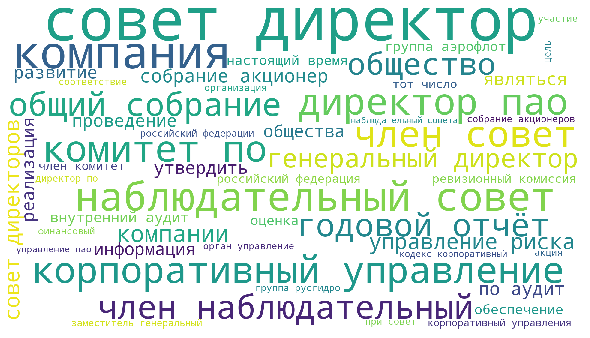

In [246]:
generate_word_cloud(overall_corp, all_combinations)    


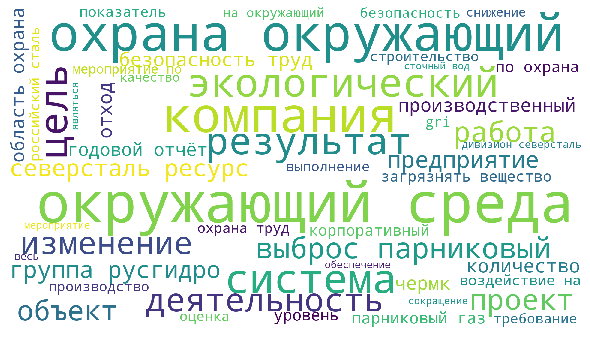

In [247]:
generate_word_cloud(overall_eco, all_combinations)

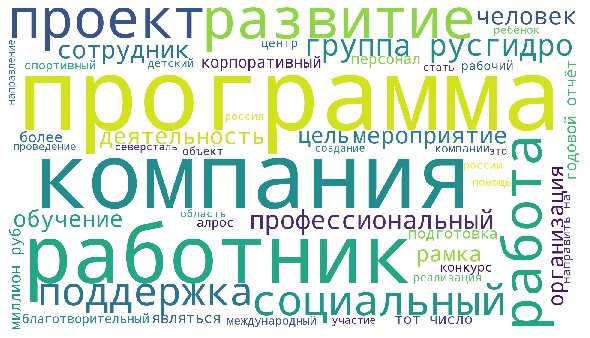

In [248]:
generate_word_cloud(overall_social, all_combinations)

In [244]:
def generate_word_cloud(words, stopwords):
    wordcloud = WordCloud(width = 1920, height = 1080,
                          max_words=50,
                    background_color ='white',
                    stopwords = stopwords, 
                    min_font_size = 20).generate(words)
#     most_frequent_count = words.count(next(iter(wordcloud.words_)))
#     for k, v in wordcloud.words_.items():
#         print(k, int(v * most_frequent_count))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [65]:
def filter_normailize(text):
    return ' '.join(
        list(map(lambda l: morph.parse(l)[0].normal_form, 
        re.sub(r"[\n\r\t]", ' ', text).split(" ")
                )))

In [ ]:
alrosa_normal_form